<a href="https://colab.research.google.com/github/SaurabhSRP/TimeSeries/blob/main/TimeSeries_1_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Install Pandas Data Reader 
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [ ]:
df_tesla=pdr.get_data_yahoo('TSLA')
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-02,65.424004,62.243999,63.787998,65.178001,65457500.0,65.178001
2017-08-03,70.000000,68.629997,69.066002,69.417999,67675000.0,69.417999
2017-08-04,71.454002,68.660004,69.400002,71.382004,46344500.0,71.382004
2017-08-07,71.896004,70.550003,71.470001,71.033997,31622500.0,71.033997
2017-08-08,73.716003,71.480003,71.505997,73.043999,37249000.0,73.043999


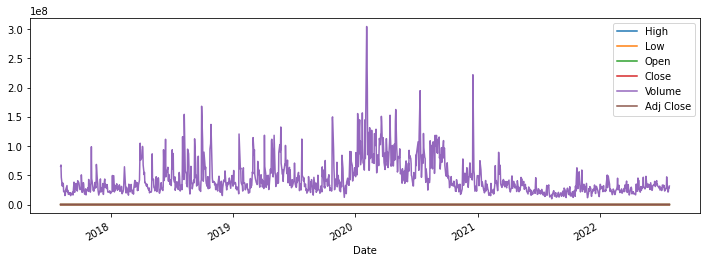

In [ ]:

df_tesla.plot(figsize=(12,4))  ##it is not the right way to see the plot

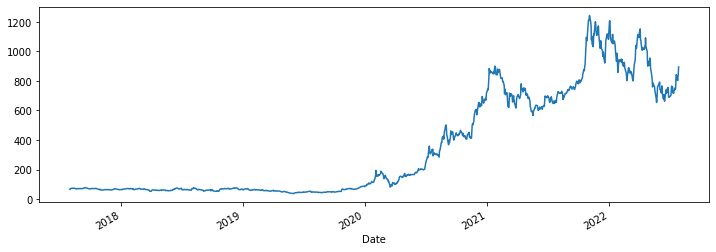

In [ ]:
df_tesla['High'].plot(figsize=(12,4)) 

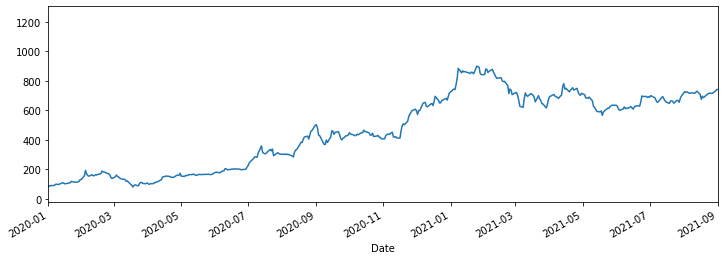

In [ ]:
##we are only interested in the part where the prices of stocks are increasing example from 2020
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

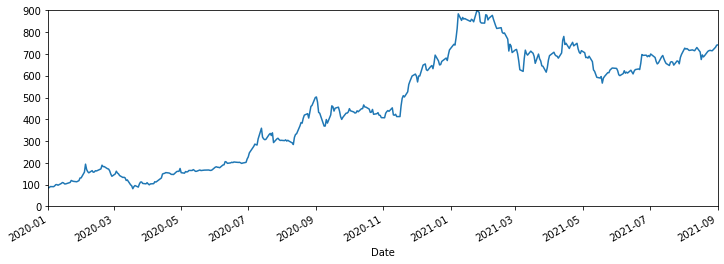

In [ ]:
###suppose we want to make changes using Y plot , that also can be done 
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

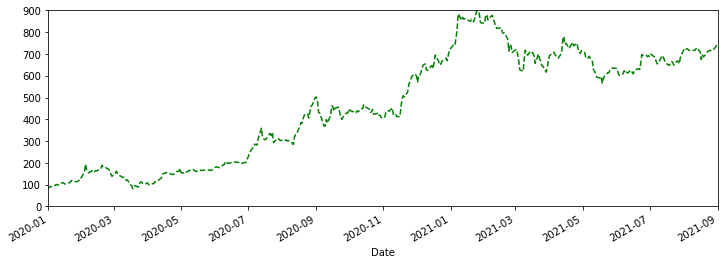

In [ ]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),ls='--',c='green')

In [ ]:
df_tesla.index ##how to extract any specific day or index

DatetimeIndex(['2017-08-02', '2017-08-03', '2017-08-04', '2017-08-07',
               '2017-08-08', '2017-08-09', '2017-08-10', '2017-08-11',
               '2017-08-14', '2017-08-15',
               ...
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [ ]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [ ]:
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

###Creating subplot

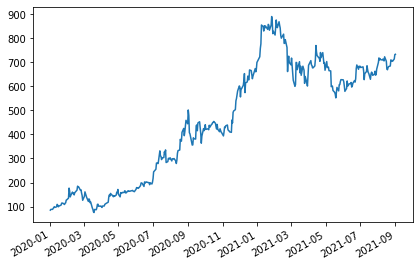

In [ ]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() ##this preventing overlapping by making x axis slant
axis.plot(index,share_open) ### as there is so much overlapping we will use plt_tight_layout

In [ ]:
##Date time Index
df_tesla=df_tesla.reset_index()
##all indexes are been create but when you check the format of Date using info you can see it shows a different value

In [ ]:
df_tesla.info()

##the format of date is shown as datetime64
##this means its in date time format 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   High       1257 non-null   float64       
 2   Low        1257 non-null   float64       
 3   Open       1257 non-null   float64       
 4   Close      1257 non-null   float64       
 5   Volume     1257 non-null   float64       
 6   Adj Close  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [ ]:
##now what if we want the index to be datetime 
##this can be done using set_index method
df_tesla.set_index(df_tesla['Date'])


,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2017-08-02,2017-08-02,65.424004,62.243999,63.787998,65.178001,65457500.0,65.178001
2017-08-03,2017-08-03,70.000000,68.629997,69.066002,69.417999,67675000.0,69.417999
2017-08-04,2017-08-04,71.454002,68.660004,69.400002,71.382004,46344500.0,71.382004
2017-08-07,2017-08-07,71.896004,70.550003,71.470001,71.033997,31622500.0,71.033997
2017-08-08,2017-08-08,73.716003,71.480003,71.505997,73.043999,37249000.0,73.043999
...,...,...,...,...,...,...,...
2022-07-25,2022-07-25,822.440002,802.200012,816.650024,805.299988,21357800.0,805.299988
2022-07-26,2022-07-26,801.929993,768.789978,799.539978,776.580017,22273600.0,776.580017
2022-07-27,2022-07-27,827.780029,785.369995,791.429993,824.460022,29370000.0,824.460022


In [ ]:
##but it still have date column
df_tesla=df_tesla.set_index('Date',drop=True)
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-02,65.424004,62.243999,63.787998,65.178001,65457500.0,65.178001
2017-08-03,70.000000,68.629997,69.066002,69.417999,67675000.0,69.417999
2017-08-04,71.454002,68.660004,69.400002,71.382004,46344500.0,71.382004
2017-08-07,71.896004,70.550003,71.470001,71.033997,31622500.0,71.033997
2017-08-08,73.716003,71.480003,71.505997,73.043999,37249000.0,73.043999


##All about DateTime Library

In [ ]:
from datetime import datetime

In [ ]:
datetime(2021,11,21) ##a datetime is created

datetime.datetime(2021, 11, 21, 0, 0)

In [ ]:
datetime.now()

datetime.datetime(2022, 8, 1, 11, 32, 35, 700918)

In [ ]:
def add_num(num1,num2):
  return num1+num2

In [ ]:
##suppose we need to see how long it takes to run a code 
start_time=datetime.now()
num1=250
num2=20

add_num(num1,num2)
end_time=datetime.now()
print(end_time-start_time)

0:00:00.000073


In [ ]:
date=datetime.now()
date

datetime.datetime(2022, 8, 1, 11, 40, 7, 268645)

In [ ]:
##we can call date only
date.date()

datetime.date(2022, 8, 1)

In [ ]:
## we can call day
date.day

1

In [ ]:
date.month

8

In [ ]:
date.year

2022

In [ ]:
date.weekday() ##basically monday, it shows in the form of 0-6

0

#**Time Resampling**

In [ ]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-02,65.424004,62.243999,63.787998,65.178001,65457500.0,65.178001
2017-08-03,70.000000,68.629997,69.066002,69.417999,67675000.0,69.417999
2017-08-04,71.454002,68.660004,69.400002,71.382004,46344500.0,71.382004
2017-08-07,71.896004,70.550003,71.470001,71.033997,31622500.0,71.033997
2017-08-08,73.716003,71.480003,71.505997,73.043999,37249000.0,73.043999


In [ ]:
###THere are different rules in time resampling
df_tesla.resample(rule='A').min()
##It will show for every year it will show minimum Highh price , min low price etc for that respective year

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,60.891998,58.526001,59.900002,59.852001,15247500.0,59.852001
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,653.919983,620.570007,623.849976,628.159973,16330900.0,628.159973


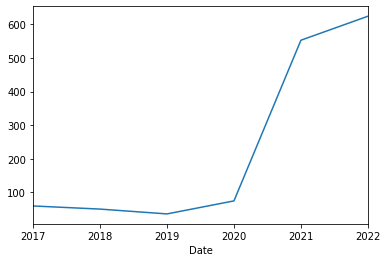

In [ ]:
df_tesla.resample(rule='A').min()['Open'].plot()

##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

to know more of rules

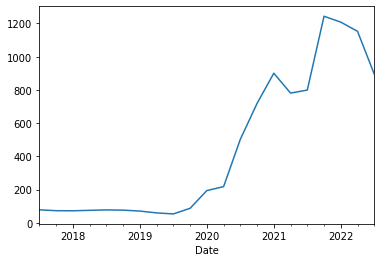

In [ ]:
##quaterly start frequency
df_tesla.resample(rule='QS').min()
df_tesla.resample(rule='QS').max()['High'].plot()

In [ ]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.536003,76.050003,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


In [ ]:
###Business quaterly 

df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,77.921997,75.536003,76.050003,77.000000,67675000.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998
2019-04-01,59.234001,57.433998,57.660000,58.362000,132735500.0,58.362000
2019-07-01,53.214001,51.632000,51.834000,52.976002,112091500.0,52.976002


PLOTTING

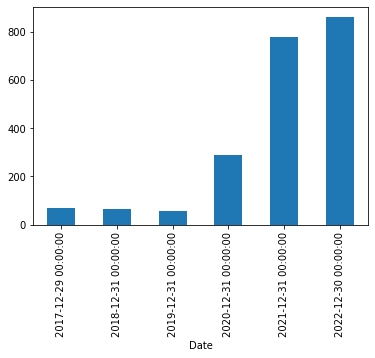

In [ ]:
df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar')

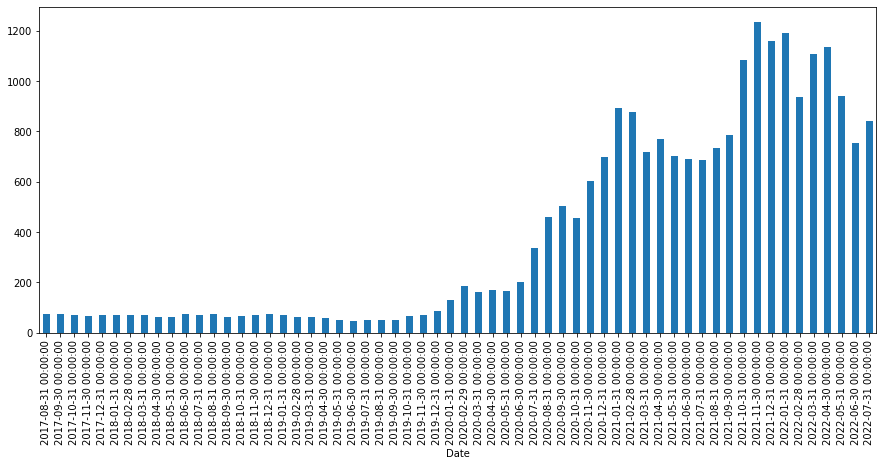

In [ ]:
##Monthly data rule - M
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

##Rolling , Expanding

In [ ]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-02,65.424004,62.243999,63.787998,65.178001,65457500.0,65.178001
2017-08-03,70.000000,68.629997,69.066002,69.417999,67675000.0,69.417999
2017-08-04,71.454002,68.660004,69.400002,71.382004,46344500.0,71.382004
2017-08-07,71.896004,70.550003,71.470001,71.033997,31622500.0,71.033997
2017-08-08,73.716003,71.480003,71.505997,73.043999,37249000.0,73.043999


In [ ]:
df_tesla['High'].head()

Date
2017-08-02    65.424004
2017-08-03    70.000000
2017-08-04    71.454002
2017-08-07    71.896004
2017-08-08    73.716003
Name: High, dtype: float64

In [ ]:
##IN built function Rolling
df_tesla['High'].rolling(10)
##window=10 , basically for 10 days

Rolling [window=10,center=False,axis=0,method=single]

In [ ]:
df_tesla['High'].rolling(10).mean().head(20)


Date
2017-08-02          NaN
2017-08-03          NaN
2017-08-04          NaN
2017-08-07          NaN
2017-08-08          NaN
2017-08-09          NaN
2017-08-10          NaN
2017-08-11          NaN
2017-08-14          NaN
2017-08-15    71.870201
2017-08-16    72.657801
2017-08-17    72.923801
2017-08-18    72.858401
2017-08-21    72.585201
2017-08-22    72.058401
2017-08-23    71.728201
2017-08-24    71.528400
2017-08-25    71.417001
2017-08-28    71.010801
2017-08-29    70.682001
Name: High, dtype: float64

In [ ]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [ ]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,
2017-08-02,65.424004,62.243999,63.787998,65.178001,65457500.0,65.178001,NaN
2017-08-03,70.000000,68.629997,69.066002,69.417999,67675000.0,69.417999,NaN
2017-08-04,71.454002,68.660004,69.400002,71.382004,46344500.0,71.382004,NaN
2017-08-07,71.896004,70.550003,71.470001,71.033997,31622500.0,71.033997,NaN
2017-08-08,73.716003,71.480003,71.505997,73.043999,37249000.0,73.043999,NaN


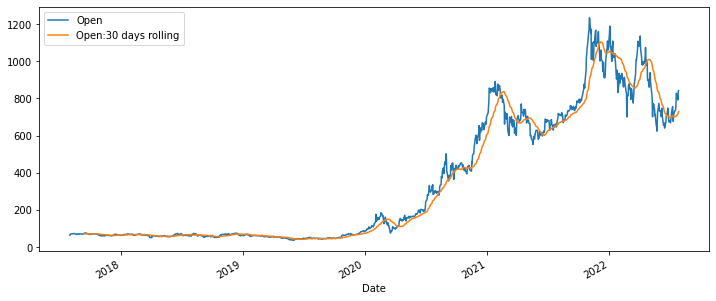

In [ ]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))